<a href="https://colab.research.google.com/github/jane560/Gap-Reduce/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 연결 및 import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir("/content/drive/MyDrive/project")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1fKYCwGVe4LxLSxWe1WPEckRFTq_shO-W/project'

In [3]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
df = pd.read_csv('ERP 입력.csv', encoding = 'utf8') #실제 생산값
print(df)

             행 레이블       일자   합계 : 수량  합계 : 노무시간  합계 : 생산직인원    실제 직접 노무비
0     1229331C6038    05/10        24        NaN         NaN          NaN
1              NaN    05/18        48        NaN         NaN          NaN
2              NaN    06/17        48        NaN         NaN          NaN
3              NaN    07/05        24        NaN         NaN          NaN
4              NaN    07/26        48        NaN         NaN          NaN
...            ...      ...       ...        ...         ...          ...
998            NaN    01/19     22680        NaN         NaN     0.000000
999   5342069B7308    01/21     53840        NaN         NaN     0.000000
1000           NaN    01/28     24000        NaN         NaN     0.000000
1001       (비어 있음)  (비어 있음)  31875794     4480.0         NaN     0.000000
1002           총합계      NaN  63135751     8971.0      4817.0  9411.196638

[1003 rows x 6 columns]


In [5]:
import pandas as pd
df1 = pd.read_csv('원가 산정.csv', encoding = 'utf8') #예측 생산량
print(df1)

               품번  원가산정시 생산인원(명/day)  원가 산정시 생산수량(ea/day)  생산량(hour)  노무 시간  \
0    1229331C6038                  5                 6000        750      8   
1    2021231A8800                  8                 2200        275      8   
2    2021931A6412                  6                 2500        313      8   
3    2021931A8314                 10                 2000        250      8   
4    2021931E7146                 10                 6000        750      8   
..            ...                ...                  ...        ...    ...   
214  5082028D6626                  3                15000       1875      8   
215  5087228F4605                  3                15000       1875      8   
216  5087228F6613                  3                15000       1875      8   
217  5087228X4605                  3                15000       1875      8   
218  5087228X6613                  3                15000       1875      8   

    공장구분   거래처구분           제품구분   개당 직접 노무비  
0    

### 전처리

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행 레이블       223 non-null    object 
 1   일자          1001 non-null   object 
 2   합계 : 수량     1003 non-null   int64  
 3   합계 : 노무시간   725 non-null    float64
 4   합계 : 생산직인원  724 non-null    float64
 5   실제 직접 노무비   996 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 47.1+ KB


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   품번                   219 non-null    object 
 1   원가산정시 생산인원(명/day)    219 non-null    int64  
 2   원가 산정시 생산수량(ea/day)  219 non-null    int64  
 3   생산량(hour)            219 non-null    int64  
 4   노무 시간                219 non-null    int64  
 5   공장구분                 219 non-null    object 
 6   거래처구분                219 non-null    object 
 7   제품구분                 219 non-null    object 
 8   개당 직접 노무비            219 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 15.5+ KB


***컬럼명 변경***

품번: item

노무 인원: worker

생산량: production(hour)

노무 시간: hour

노무비: cost

In [8]:
df1.columns = ['item','worker','production(day)','production(hour)','hour','공장구분','거래처구분','제품구분','cost']

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item              219 non-null    object 
 1   worker            219 non-null    int64  
 2   production(day)   219 non-null    int64  
 3   production(hour)  219 non-null    int64  
 4   hour              219 non-null    int64  
 5   공장구분              219 non-null    object 
 6   거래처구분             219 non-null    object 
 7   제품구분              219 non-null    object 
 8   cost              219 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 15.5+ KB


In [10]:
df1.isnull().sum()

item                0
worker              0
production(day)     0
production(hour)    0
hour                0
공장구분                0
거래처구분               0
제품구분                0
cost                0
dtype: int64

In [11]:
df.columns = ['num','date','production(hour)','hour','worker','cost']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num               223 non-null    object 
 1   date              1001 non-null   object 
 2   production(hour)  1003 non-null   int64  
 3   hour              725 non-null    float64
 4   worker            724 non-null    float64
 5   cost              996 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 47.1+ KB


In [13]:
newdf = df.dropna()

In [14]:
newdf1 = df1.dropna()

In [15]:
newdf

,num,date,production(hour),hour,worker,cost
7,2021231A8800,05/17,600,2.0,8.0,366.666667
12,2021931A6412,11/11,1600,7.0,6.0,360.937500
13,2021931A8314,03/08,1920,8.0,6.0,343.750000
15,2021931E7146,03/30,4400,8.0,8.0,200.000000
28,2022031D4653,02/08,1056,7.0,8.0,729.166667
...,...,...,...,...,...,...
860,2492031A8364,04/12,5000,4.0,5.0,55.000000
862,2512031B8126,05/13,4980,4.0,5.0,55.220884
863,25211131A8222,03/23,208,1.0,1.0,66.105769
864,2522031A8154,01/18,5175,4.0,5.0,53.140097


In [16]:
newdf1

,item,worker,production(day),production(hour),hour,공장구분,거래처구분,제품구분,cost
0,1229331C6038,5,6000,750,8,2공장,자사-하나로,"묶음 포장, 바코드 부착",91.666667
1,2021231A8800,8,2200,275,8,2공장,PB,매트 180매,400.000000
2,2021931A6412,6,2500,313,8,2공장,OEM,전환포장,264.000000
3,2021931A8314,10,2000,250,8,2공장,OEM,매트포장,550.000000
4,2021931E7146,10,6000,750,8,2공장,OEM,매트포장,183.333333
...,...,...,...,...,...,...,...,...,...
214,5082028D6626,3,15000,1875,8,2공장,ODM,리퀴드반제품,22.000000
215,5087228F4605,3,15000,1875,8,2공장,ODM,리퀴드반제품,22.000000
216,5087228F6613,3,15000,1875,8,2공장,ODM,리퀴드반제품,22.000000
217,5087228X4605,3,15000,1875,8,2공장,ODM,리퀴드반제품,22.000000


(아직 안함함)데이터 선택 시각화 하면면 좋을을 것것 같아
### 품목이 많은 갯수로 나열해보기 * ranking + 그래프

### Scaling

### Modeling: 다중선형회귀분석

순서: 데이터선택 -> 훈련/테스트 데이터 분류 -> 모델링 -> 평가

modeling(1) - 예측 생산량 관련 회귀분석

In [34]:
#분석 데이터 준비
x_data = newdf[["worker","hour","cost"]]
target = newdf[["production(hour)"]]

In [35]:
x_data

,worker,hour,cost
7,8.0,2.0,366.666667
12,6.0,7.0,360.937500
13,6.0,8.0,343.750000
15,8.0,8.0,200.000000
28,8.0,7.0,729.166667
...,...,...,...
860,5.0,4.0,55.000000
862,5.0,4.0,55.220884
863,1.0,1.0,66.105769
864,5.0,4.0,53.140097


In [36]:
target

,production(hour)
7,600
12,1600
13,1920
15,4400
28,1056
...,...
860,5000
862,4980
863,208
864,5175


In [37]:
import numpy as np
import statsmodels.api as sm

모델 평가

### modeling(2) - 실제 생산값 회귀분석

모델링 평가

In [38]:
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       production(hour)   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              93.13
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                    1.53e-35
Time:                        01:14:53   Log-Likelihood:                         -1700.3
No. Observations:                 171   AIC:                                      3407.
Df Residuals:                     168   BIC:                                      3416.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
worker       342.1988    133.121      2.571      0.011      79.393     605.005
hour         849.6347    149.083      5.699      0.000     555.317    1143.952
cost          -4.2643      0.867     -4.920      0.000      -5.975      -2.553
==============================================================================
Omnibus:                      145.873   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1606.374
Skew:                           3.253   Prob(JB):                         0.00
Kurtosis:                      16.532   Cond. No.                         248.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x_data1 = newdf1[["worker","hour","cost"]]
target = newdf1[["production(hour)"]]

In [40]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model1 = multi_model.fit()
fitted_multi_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       production(hour)   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     20.36
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.90e-09
Time:                        01:15:02   Log-Likelihood:                -1851.3
No. Observations:                 219   AIC:                             3709.
Df Residuals:                     216   BIC:                             3719.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
worker        37.0453     34.046      1.088      0.278     -30.060     104.150
hour         178.2501     29.945      5.953      0.000     119.229     237.272
cost          -2.5229      0.402     -6.270      0.000      -3.316      -1.730
==============================================================================
Omnibus:                      126.512   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.519
Skew:                           2.521   Prob(JB):                    1.25e-109
Kurtosis:                       8.436   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### modeling(3) - 예측값 회귀분석과 실제값 회귀분석 간의 차이 확인
(그래프 그리기)

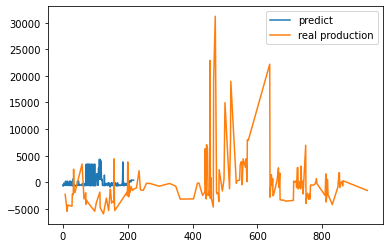

In [41]:
import matplotlib.pyplot as plt
fitted_multi_model1.resid.plot(label = "predict")
fitted_multi_model.resid.plot(label = "real production")
plt.legend()

3-1. 차이 회귀분석

다중공선성 평가(상관관계 분석) - 필요없을지도도..

In [42]:
x_data1.corr()

,worker,hour,cost
worker,1.000000,NaN,0.350884
hour,NaN,NaN,NaN
cost,0.350884,NaN,1.000000


In [43]:
x_data.corr()

,worker,hour,cost
worker,1.000000,0.261251,0.027438
hour,0.261251,1.000000,0.129413
cost,0.027438,0.129413,1.000000


In [28]:
x_data

,worker,hour,cost
7,8.0,2.0,366.666667
12,6.0,7.0,360.937500
13,6.0,8.0,343.750000
15,8.0,8.0,200.000000
28,8.0,7.0,729.166667
...,...,...,...
860,5.0,4.0,55.000000
862,5.0,4.0,55.220884
863,1.0,1.0,66.105769
864,5.0,4.0,53.140097


In [29]:
x_data1

,worker,hour,cost
0,5,8,91.666667
1,8,8,400.000000
2,6,8,264.000000
3,10,8,550.000000
4,10,8,183.333333
...,...,...,...
214,3,8,22.000000
215,3,8,22.000000
216,3,8,22.000000
217,3,8,22.000000


3-2. 정확도 평가